In [124]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
#read the data

data = pd.read_csv("C:/Users/Ganesh/Downloads/Bank_Personal_Loan_Modelling.csv")

In [126]:
#preview of the data
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [127]:
print(data.shape)

(5000, 14)


The dataset contains 5000 rows and 14 columns.

In [128]:
#data types
print(data.dtypes)

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


The above are the datatypes of the object for this dataset. Most of the varaibles are integer except CCAvg whicg is Float.

In [129]:
#printing list of columns
print(data.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [130]:
print(data.describe())

                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000  

In [131]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


The above are the statiscal summary for all varaibles in the dataset.

In [132]:
#check for null value
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

It concludes that this dataset doesnot contain any non null values.

### EDA

#### Number of unique items in each column

In [133]:
for col in data.columns:
    print("The unique elements of %s are %2d" %(col,data[col].nunique()))

The unique elements of ID are 5000
The unique elements of Age are 45
The unique elements of Experience are 47
The unique elements of Income are 162
The unique elements of ZIP Code are 467
The unique elements of Family are  4
The unique elements of CCAvg are 108
The unique elements of Education are  3
The unique elements of Mortgage are 347
The unique elements of Personal Loan are  2
The unique elements of Securities Account are  2
The unique elements of CD Account are  2
The unique elements of Online are  2
The unique elements of CreditCard are  2


#### Number of people with zero mortage

In [134]:
print(data['Mortgage'][data['Mortgage']==0].count())

3462


3462 out of 5000 people where not having any mortgage.

####  Number of people with zero credit card spending per month?

In [135]:
print(data['CreditCard'][data['CreditCard']==0].count())

3530


3530 out of 5000 people are having zero credit card spending per month.

####  Value counts of all categorical columns.

In [136]:
for col in data.columns:
    if data[col].nunique() >=2 and data[col].nunique()<=5:
        print(data[col].value_counts())
    

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


#### Target Varaible

In the dataset, the target variable is Personal loan. We are going to predict if a person is eligigle for a personal loan by co nsdering all the factors such as income, family, education, mortage,credit card spending etc.

In [137]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

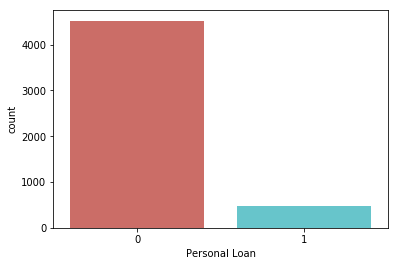

In [138]:
sns.countplot(x='Personal Loan', data=data, palette ='hls')

Till now, 4250 people have not taken personal loan while 480 people have taken it.

#### Univariate analysis

E:\BIGDATA\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\BIGDATA\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


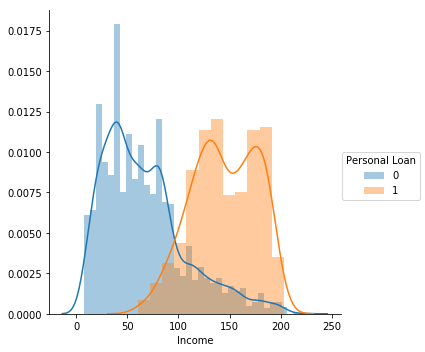

In [139]:
sns.FacetGrid(data, hue='Personal Loan',size=5).map(sns.distplot,"Income").add_legend()

From this observation, we can say that income in the range between 60 and 200 have more chances of taking loan

E:\BIGDATA\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\BIGDATA\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


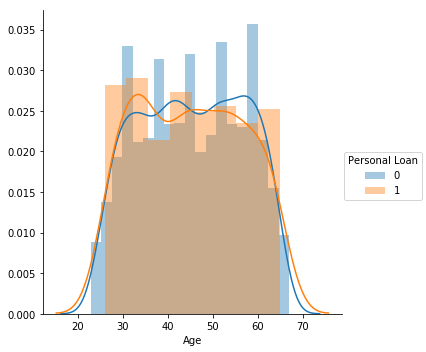

In [140]:
sns.FacetGrid(data, hue='Personal Loan',size=5).map(sns.distplot,"Age").add_legend()

From this observation, we can say that Age in the range between 30 and 60 have more chances of taking loan

E:\BIGDATA\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\BIGDATA\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


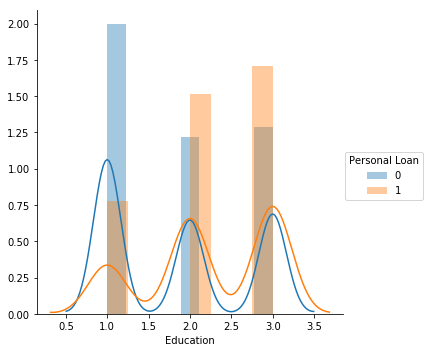

In [141]:
sns.FacetGrid(data, hue='Personal Loan',size=5).map(sns.distplot,"Education").add_legend()

It is evident that whoever has higher education will take loans.

E:\BIGDATA\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\BIGDATA\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


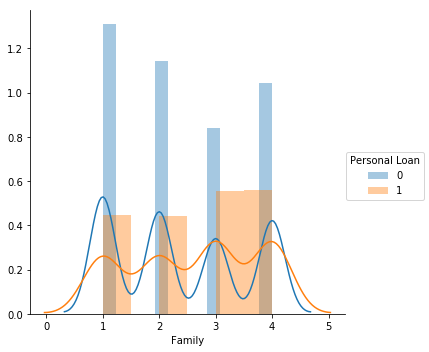

In [142]:
sns.FacetGrid(data, hue='Personal Loan',size=5).map(sns.distplot,"Family").add_legend()

If the family size increases, percentage of taking loan also increases.

#### Bivariate Analysis

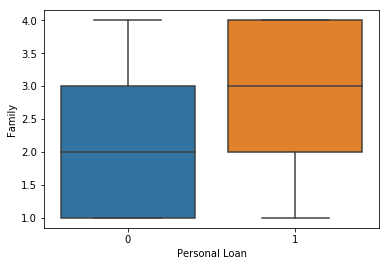

In [143]:
sns.boxplot(x='Personal Loan', y='Family', data = data)
plt.show()

It is evident that family size between 2 and 4 are willing to take loans.

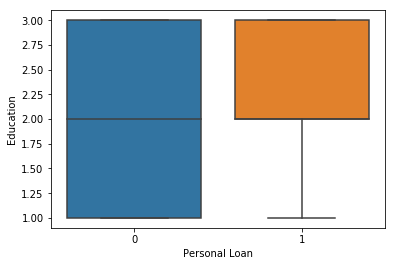

In [144]:
sns.boxplot(x='Personal Loan', y='Education', data = data)
plt.show()

People with higher education are willing to take loans.

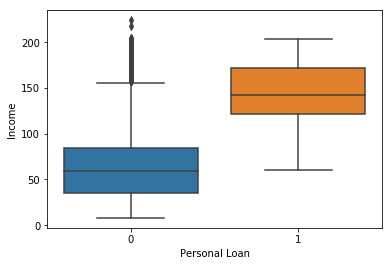

In [145]:
sns.boxplot(x='Personal Loan', y='Income', data = data)
plt.show()

Only People with higher income are willing to take loans.

### Modelling

Get the X and y(target varaible) for the dataset.

In [146]:
X = data.loc[:, data.columns!= 'Personal Loan']
y = data.loc[:, data.columns == 'Personal Loan']

In [147]:
#Splitting X and y 

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

The dataset has been spliited into 70 % training and 30% test.

In [148]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((3500, 13), (1500, 13), (3500, 1), (1500, 1))

In [149]:
#fit the logistic regression

#import the library
from sklearn.linear_model import LogisticRegression

#instantiate the model
logreg = LogisticRegression()

#fit the model
logreg.fit(X_train, y_train)


E:\BIGDATA\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [150]:
#Prediction of the model

y_pred = logreg.predict(X_test)

In [151]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

##### Model evaluation

In [152]:
#import the metric class

from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[1330,   42],
       [  78,   50]], dtype=int64)

Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 1330 and 50 are actual predictions, and 42 and 78 are incorrect predictions.

In [153]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.92
Precision: 0.5434782608695652
Recall: 0.390625


We have got a accuracy score of 92%. This considered as a good accuracy.

Precision - Precision is all about precise. Logistic Model predicted customers will take loans 54% of the time

Recal - If the people who have taken loan in the test set and your logistic regression model can identify 39% of the time. 

In [154]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.97      0.96      1372
          1       0.54      0.39      0.45       128

avg / total       0.91      0.92      0.91      1500



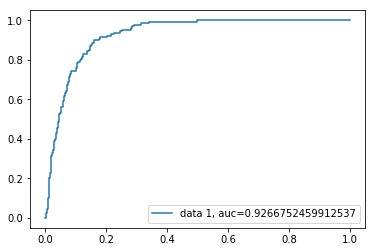

In [155]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC(Area Under Curve) score for the case is 0.92. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

### Inference about Logistic Regression

Logistic Regression is one of the powerful regression. It is useful to solve complex ones also.
It cannot solve non-linear problems.
Logistic regression doesnot work well with independent variable which is not correlated with target variable.

### Conclusion

We have analyzed the data thorougly and modelled using Logistic Regression. We have discussed about model parameter metric also. We have visualized the results too.